In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [4]:
# Wczytaj dane z pliku CSV (oczekiwane kolumny: 'x', 'y')
df = pd.read_csv('13.csv')
print(df.head())
print(df.columns)

   -1.376256307454838179e+00  3.222508318041564124e+00  \
0                   3.166024                  2.278427   

   2.892457266383145154e+00  1.663793407310760530e+00  \
0                  2.047764                  3.686334   

   3.101464027441197757e+00  2.487007584768573754e+00  \
0                  0.741686                   1.46927   

   4.825142517730909297e+00  -7.072951794202091413e-01  \
0                  1.612576                  -3.441604   

   2.384412776477074392e+00  3.413376685069078320e+00  ...  \
0                  0.754981                  -0.50035  ...   

   -2.572043837500718855e+00  -2.585843691301225267e+00  \
0                   0.007587                   3.979374   

   -7.859322199750671256e-01  -1.174792254793281199e+00  \
0                    -0.4098                   1.218813   

   -1.924053725715900054e+00  2.262196327206881241e-01  \
0                   0.359034                  3.874871   

   -1.064187381741635186e+00  2.263612160542827212e-01  

Środek danych (średnia):
  x̄ = 0.9726
  ȳ = 1.5310

Główne osie (wektory PCA):
  Pierwsza oś (v1): [-0.92139248 -0.38863338]
  Druga oś (v2):   [-0.38863338  0.92139248]

Kąt obrotu pierwszej osi względem osi x:
  θ = -157.13° (-2.7424 rad)



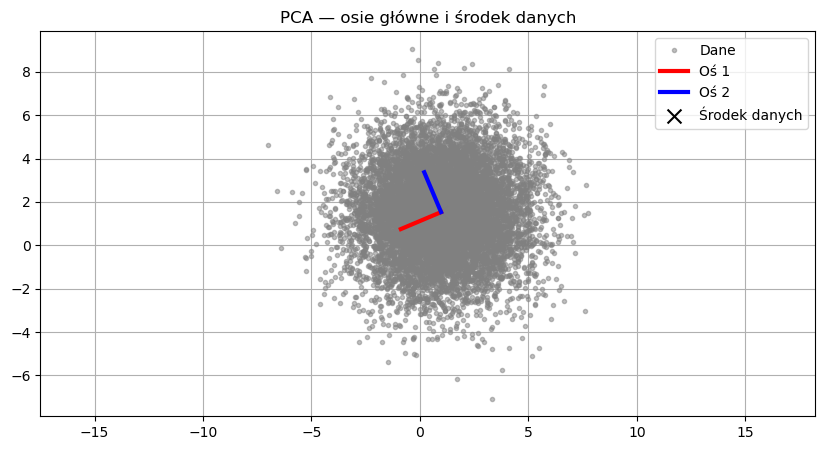

In [8]:


plt.rcParams['figure.figsize'] = [16, 8]

# 1. Wczytaj dane z pliku CSV (oczekiwane kolumny: 'x', 'y')
df = pd.read_csv('12.csv',header=None)
flat_data = df.values.flatten()

# Upewnij się, że liczba wartości jest parzysta
if len(flat_data) % 2 != 0:
    raise ValueError("Nieparzysta liczba wartości — oczekiwane pary (x, y)")

# Zamień dane na macierz 2 x N
X = flat_data.reshape(2, -1)
nPoints = X.shape[1]

# === 1. ŚRODEK DANYCH ===
Xavg = np.mean(X, axis=1)  # Średnia po x i y
print("Środek danych (średnia):")
print(f"  x̄ = {Xavg[0]:.4f}")
print(f"  ȳ = {Xavg[1]:.4f}\n")

# === 2. PCA przez SVD ===
# Odjęcie średniej
B = X - Xavg[:, np.newaxis]

# SVD (PCA)
U, S, VT = np.linalg.svd(B / np.sqrt(nPoints), full_matrices=False)

# === 3. Wektory głównych osi ===
print("Główne osie (wektory PCA):")
print(f"  Pierwsza oś (v1): {U[:,0]}")
print(f"  Druga oś (v2):   {U[:,1]}\n")

# === 4. Kąt obrotu względem osi x ===
# Kąt między pierwszym wektorem a osią x
angle_rad = np.arctan2(U[1,0], U[0,0])
angle_deg = np.degrees(angle_rad)
print(f"Kąt obrotu pierwszej osi względem osi x:")
print(f"  θ = {angle_deg:.2f}° ({angle_rad:.4f} rad)\n")

# === 5. Wizualizacja ===
plt.figure(figsize=(10, 5))
plt.plot(X[0, :], X[1, :], '.', color='gray', alpha=0.5, label='Dane')

# Osie główne (skalowane długościami osobliwymi)
for i, color in zip([0, 1], ['red', 'blue']):
    plt.plot([Xavg[0], Xavg[0] + U[0, i] * S[i]],
             [Xavg[1], Xavg[1] + U[1, i] * S[i]],
             '-', linewidth=3, color=color, label=f'Oś {i+1}')

plt.scatter(*Xavg, color='black', marker='x', s=100, label='Środek danych')
plt.title("PCA — osie główne i środek danych")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()